In [2]:
# Imports
from strkernel.mismatch_kernel import MismatchKernel
from strkernel.mismatch_kernel import MismatchTrie
from strkernel.mismatch_kernel import preprocess

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
# Imports
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

In [4]:
# Functions
#Get integers from chirality string
def toInt(chirality_string):
    buff = re.split(r"[();]",chirality_string)
    return [int(buff[1]),int(buff[2])]

#Get the chirality from the list of chirality strings
def getChirality(chirality_list):
    return np.array([toInt(i) for i in chirality_list])

In [5]:
# Load the data
training_set = pd.read_csv('../Data/training_set.csv')

In [6]:
# Change labels to 0 and 1
training_set['Label'] = training_set['Label'].apply(lambda x: 1 if x == 'Y' else 0)
# Get the chirality
chirality = getChirality(training_set['Chirality'])
# Dataframe with the chirality
chirality_df = pd.DataFrame(chirality,columns=['m','n'])

In [7]:
# Preprocess
x = preprocess(training_set['Sequence'])
# Compute mismatch kernels
kernels = MismatchKernel( l = 4,
                          k = 5,
                          m = 1 ).get_kernel(x).kernel

In [8]:
kernels_df = pd.DataFrame(kernels)
#Keep every 12th kernel
for(i) in range(kernels.__len__()):
    if(i%12!=0):
        kernels_df.drop(i,axis=1,inplace=True)
kernels_df.head(10)

,0,12,24,36,48,60,72,84,96,108,...,852,864,876,888,900,912,924,936,948,960
0,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.491354,0.312622,0.338531,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777
1,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.491354,0.312622,0.338531,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777
2,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.491354,0.312622,0.338531,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777
3,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.491354,0.312622,0.338531,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777
4,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.491354,0.312622,0.338531,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777
5,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.491354,0.312622,0.338531,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777
6,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.491354,0.312622,0.338531,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777
7,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.491354,0.312622,0.338531,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777
8,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.491354,0.312622,0.338531,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777
9,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.491354,0.312622,0.338531,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777


In [9]:
#Merge the dataframes
data = pd.concat([kernels_df,chirality_df,training_set['Label']],axis=1)
data.head(10)

,0,12,24,36,48,60,72,84,96,108,...,888,900,912,924,936,948,960,m,n,Label
0,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777,10,2,0
1,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777,10,3,0
2,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777,11,1,0
3,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777,8,5,0
4,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777,9,6,0
5,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777,9,9,0
6,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777,7,3,0
7,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777,8,5,0
8,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777,11,2,0
9,1.0,0.758947,0.715055,0.715055,0.769488,0.86,0.890871,0.79,0.709039,0.709039,...,0.353089,0.680738,0.322126,0.41,0.484934,0.362392,0.176777,8,8,0


In [14]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['Label'],axis=1),
                                                                        data['Label'],
                                                                        test_size=0.2,
                                                                        random_state=40)
# Model
model = SVC(kernel='linear')
# Train
model.fit(X_train,Y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVC(kernel='linear')

Accurace of the model is: 0.9846153846153847


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


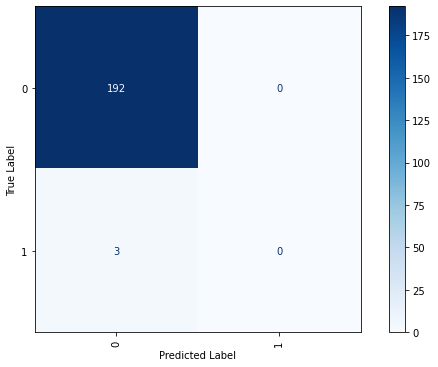

In [15]:
predictions = model.predict(X_test)
print('Accurace of the model is: {}'.format(accuracy_score(Y_test, predictions)))
matrix = ConfusionMatrixDisplay(confusion_matrix(Y_test, predictions))
matrix.plot(cmap=plt.cm.Blues, include_values=True, xticks_rotation='vertical')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')
plt.gcf().set_size_inches(10,6)

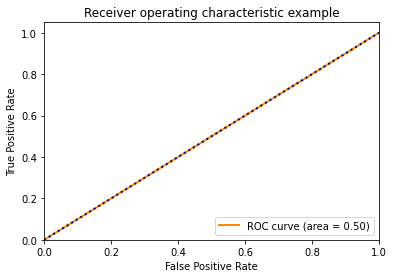

In [16]:
# ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()